
## 作業一



### 閱讀PDF(LeNet AlexNet Vgg系列) 與YT , 並回答以下問題: (請自行google解答)


* 1. 一開始你學到的手寫辨識CNN模型 最接近哪個Net?

A:最接近LeNet

* 2. AlexNet中,使用Relu取代sigmoid的普遍解釋是甚麼?

A:Relu公式:f(x) = max (0, x),解決sigmoid梯度消失問題

* 3. 為何梯度消失會影響模型訓練?

A:因為參數越來越小,變0後,反向更新時,參數無法繼續更新

* 4. Dropout 具有避免Overfitting 的功能,如何解釋呢?

A:在反向傳播時，被丟棄的神經元其梯度是 0，所以在訓練時不會過度依賴某一些神經元，藉此達到對抗過擬合的效果。

* 5. Augmentation 的用途是? 

A:Image augmentation 兩個主要的功能包含『彌補資料不足』以及『避免Overfitting』

彌補資料不足:

藉由旋轉、裁切、增加噪點、白化等技術，將原本的圖片做了一些『加強』，如此一來，我們就硬生生地增加了許多的資料。

避免Overfitting:

藉由增加資料量來避免Overfitting

[Tips for Training DNN 李弘毅 (與2,3,4題有相關)](https://www.youtube.com/watch?v=xki61j7z-30&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&index=16)

### 閱讀PDF(inception系列) 回答以下問題: (請自行google解答)

* Inception Layer 的精神是?

A:Inception Layer:：⽬的在於結合不同 Receptive Field的特徵圖。

註:深度神經網絡中的感受野(Receptive Field):在機器視覺領域的深度神經網絡中有一個概念叫做感受野，用來表示網絡內部的不同位置的神經元對原圖像的感受範圍的大小。神經元之所以無法對原始圖像的所有信息進行感知，是因為在這些網絡結構中普遍使用卷積層和pooling層，在層與層之間均為局部相連（通過sliding filter）。神經元感受野的值越大表示其能接觸到的原始圖像範圍就越大，也意味著他可能蘊含更為全局、語義層次更高的特徵；而值越小則表示其所包含的特徵越趨向於局部和細節。因此感受野的值可以大致用來判斷每一層的抽象層次。

可以看到在Conv1中的每一個單元所能看到的原始圖像範圍是3 * 3，而由於Conv2的每個單元都是由2 * 2範圍的Conv1構成，因此回溯到原始圖像，其實是能夠看到的原始圖像範圍的。因此我們說Conv1的感受野是3，Conv2的感受野是5.輸入圖像的每個單元的感受野被定義為1，這應該很好理解，因為每個像素只能看到自己。
[參考:深度神經網絡中的感受野(Receptive Field)](https://zhuanlan.zhihu.com/p/28492837)
* 1x1 Conv 的用途是?

A:

1.倘若我們使用 output channel 數目不為 1 的 1x1 filter，就相等於對橫切面每一個空間位置做 fully-connected layer 的全連接線性映射運算

2.可以自由的增加和降低參數(透過增減filter數)

###  閱讀PDF(ResNet系列)回答以下問題: (請自行google解答)

* ResNet 如何解決梯度消失的問題?

A:導入殘差結構->將輸入的input與經過2–3層的F(x)跨接並相加，使輸出表⽰為y=F(x)+x，這樣的好處在於反向傳播時能保證⾄少會有⼀個1存在，降低梯度消失 (vanishing gradient) 發⽣的可能性。

* 模型越深越好嗎? 為什麼?

A:在不發生Overfitting和梯度消失的前提下,足夠深的模型可以挖掘更多特徵,更有機會收斂,而為何不寬而是深在[參考:ML Lecture 11: Why Deep?](https://www.youtube.com/watch?v=XsC9byQkUH8&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&index=20)有提到,如果模型用深而不是寬,需要的參數比較少,這也就意味著比較不容易overfitting,需要的資料也比較少

* 深度學習模型隨著設計,是否一代完勝一代?

A:根據ImageNet classificatoin排行,是

### 答案可直接打在jupyter
#### 補充:
造成Overfitting的原因與解決方式
* 1.訓練資料太少

取得更多的資料
這個方法就是收集更多的資料，或是自行生成更多的有效資料(如果你生成一些跟模型無關的資料去訓練只會越來越糟 😕，所以必需確正自行生成的資料對訓練模型是有幫助)

* 2.擁有太多的參數，功能太強的模型

減少參數或特徵或者是減少神經層數

在相同參數跟相同資料量的情況下，可以使用Regularization(正規化)

在相同參數跟相同資料量的情況下，可以使用Dropout

## 作業二



參考此網站,使用InceptionResNetV2對瘧疾細胞再進行訓練 觀看差異

[參考網站](https://www.cnblogs.com/wj-1314/p/12526708.html)

範例code

[資料連結](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria)

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.InteractiveSession(config=config)

In [3]:
data = [] # 1 step
label = []
count=0
for i in os.listdir("D:/cell_images/Parasitized/"): # 2 step
    try:
        img = cv2.imread('D:/cell_images/Parasitized/'+i).astype('float32')
        img = cv2.resize(img,(100,100),interpolation=cv2.INTER_CUBIC) # 2-1
        data.append(img) # 2-2 
        label.append(0) # 2-3
    except:
        pass
    count+=1
    if count>=50:
        break
count=0
for i in os.listdir("D:/cell_images/Uninfected/"):
    try:
        img = cv2.imread('D:/cell_images/Uninfected/'+i).astype('float32')
        img = cv2.resize(img,(100,100),interpolation=cv2.INTER_CUBIC) # 2-1
        data.append(img) # 2-2 
        label.append(1) # 2-3
    except:
        pass
    count+=1
    if count>=50:
        break
data = np.array(data) # 3
label = np.array(label) #3

label_one_hot = np_utils.to_categorical(label) # 4

data_norm = data / 255 

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data_norm, label_one_hot, test_size=0.33, random_state=42)

In [5]:
X_train.shape

(67, 100, 100, 3)

In [6]:
Y_train.shape

(67, 2)

In [7]:
Y_train[0]

array([1., 0.], dtype=float32)

In [8]:

X_train[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [9]:
from keras.models import *
from keras.layers import *
from keras.applications import *

model_name = 'InceptionResNetV2'
img_rows, img_cols, img_channel = 100, 100, 3  ## 圖片的長寬與顏色
base_model = InceptionResNetV2(weights=None,include_top=False, ## 從application直接呼叫模型
                         input_shape=(img_rows, img_cols, img_channel))
x = base_model.output
x = GlobalAveragePooling2D(data_format='channels_last')(x) ## 加一層pooling 
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x) ## 分兩類 感染跟未感染細胞
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 49, 49, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 49, 49, 32)   0           batch_normalization_1[0][0]      
____________________

In [10]:
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 開始訓練  
train_history = model.fit(x=X_train,  
                          y=Y_train, validation_split=0.2,  
                          epochs=10, batch_size=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 53 samples, validate on 14 samples
Epoch 1/10
53/53 [==============================] - 10s 197ms/step - loss: 1.3841 - accuracy: 0.5283 - val_loss: 0.6666 - val_accuracy: 0.6429
Epoch 2/10
53/53 [==============================] - 1s 25ms/step - loss: 0.7745 - accuracy: 0.6981 - val_loss: 0.8539 - val_accuracy: 0.6429
Epoch 3/10
53/53 [==============================] - 1s 25ms/step - loss: 0.9002 - accuracy: 0.7547 - val_loss: 0.6537 - val_accuracy: 0.6429
Epoch 4/10
53/53 [==============================] - 1s 25ms/step - loss: 0.8361 - accuracy: 0.6981 - val_loss: 0.9243 - val_accuracy: 0.6429
Epoch 5/10
53/53 [==============================] - 1s 26ms/step - loss: 0.6731 - accuracy: 0.7547 - val_loss: 0.7097 - val_accuracy: 0.6429
Epoch 6/10
53/53 [==============================] - 1s 25ms/step - loss: 0.6023 - accuracy: 0.9057 - val_loss: 0.6828 - val_accuracy: 0.6429
Epoch 7/10
53/53 [==============================] - 1s 25ms/

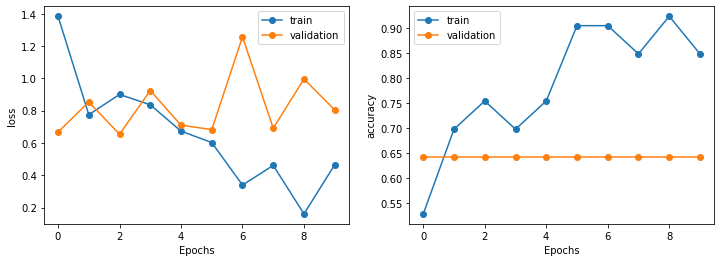

In [11]:
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(train_history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(train_history, 'accuracy','val_accuracy')

In [12]:
Y_test = np.argmax(Y_test,axis=1)
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred,axis=1)

              precision    recall  f1-score   support

 Parasitized       0.00      0.00      0.00        19
  Uninfected       0.42      1.00      0.60        14

    accuracy                           0.42        33
   macro avg       0.21      0.50      0.30        33
weighted avg       0.18      0.42      0.25        33



c:\users\z1999\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


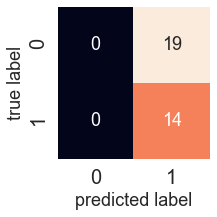

In [13]:
mat = confusion_matrix(Y_test,Y_pred)
sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('true label')
plt.xlabel('predicted label');

target_names = ["Parasitized","Uninfected"]
print(classification_report(Y_test,Y_pred,target_names=target_names))

## Transfer Learning

In [14]:
from keras.models import *
from keras.layers import *
from keras.applications import *

model_name = 'InceptionResNetV2'
img_rows, img_cols, img_channel = 100, 100, 3  ## 圖片的長寬與顏色
base_model = InceptionResNetV2(weights='imagenet',include_top=False, ## 從application直接呼叫模型
                         input_shape=(img_rows, img_cols, img_channel))
x = base_model.output
x = GlobalAveragePooling2D(data_format='channels_last')(x) ## 加一層pooling 
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x) ## 分兩類 感染跟未感染細胞
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

219062272/219055592 [==============================] - 73s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 49, 49, 32)   96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 49, 49, 32)   0           batch_normalization_204[0][0]    
________________________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 開始訓練  
train_history = model.fit(x=X_train,  
                          y=Y_train, validation_split=0.2,  
                          epochs=10, batch_size=10, verbose=1)

Train on 53 samples, validate on 14 samples
Epoch 1/10
53/53 [==============================] - 11s 213ms/step - loss: 1.3519 - accuracy: 0.5283 - val_loss: 2.9801 - val_accuracy: 0.6429
Epoch 2/10
53/53 [==============================] - 1s 25ms/step - loss: 1.0914 - accuracy: 0.7547 - val_loss: 10.0574 - val_accuracy: 0.2857
Epoch 3/10
53/53 [==============================] - 1s 25ms/step - loss: 0.9244 - accuracy: 0.6981 - val_loss: 5.8903 - val_accuracy: 0.2857
Epoch 4/10
53/53 [==============================] - 1s 27ms/step - loss: 0.5886 - accuracy: 0.7736 - val_loss: 1.4243 - val_accuracy: 0.2857
Epoch 5/10
53/53 [==============================] - 1s 26ms/step - loss: 0.3085 - accuracy: 0.8302 - val_loss: 1.0137 - val_accuracy: 0.6429
Epoch 6/10
53/53 [==============================] - 1s 27ms/step - loss: 0.4196 - accuracy: 0.8868 - val_loss: 4.1879 - val_accuracy: 0.4286
Epoch 7/10
53/53 [==============================] - 1s 26ms/step - loss: 0.4516 - accuracy: 0.8679 - val_lo

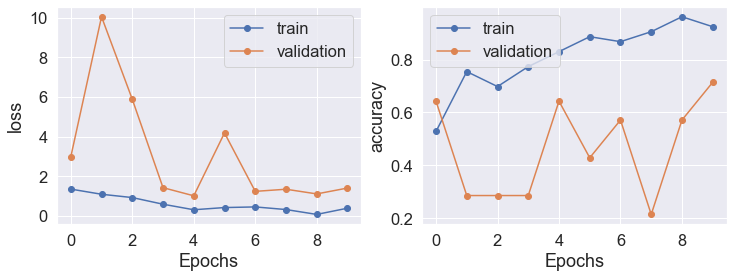

In [18]:
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(train_history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(train_history, 'accuracy','val_accuracy')

In [21]:
# Y_test = np.argmax(Y_test,axis=1)
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred,axis=1)

              precision    recall  f1-score   support

 Parasitized       1.00      0.32      0.48        19
  Uninfected       0.52      1.00      0.68        14

    accuracy                           0.61        33
   macro avg       0.76      0.66      0.58        33
weighted avg       0.80      0.61      0.57        33



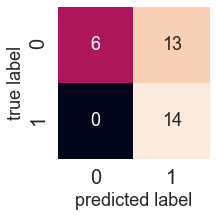

In [22]:
mat = confusion_matrix(Y_test,Y_pred)
sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('true label')
plt.xlabel('predicted label');

target_names = ["Parasitized","Uninfected"]
print(classification_report(Y_test,Y_pred,target_names=target_names))

In [18]:
base_model.output

<tf.Tensor 'conv_7b_ac/Relu:0' shape=(?, 5, 5, 1536) dtype=float32>